# Using Tensorflow

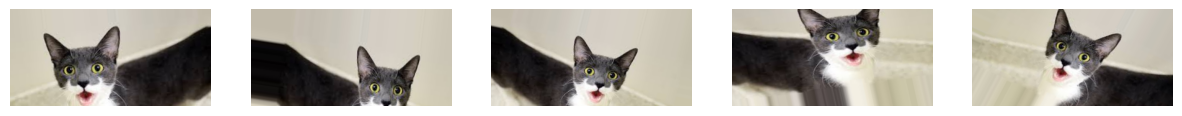

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define an ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=30,         # Rotate images by 30 degrees
    width_shift_range=0.2,     # Shift horizontally by 20%
    height_shift_range=0.2,    # Shift vertically by 20%
    shear_range=0.2,           # Apply shearing transformation
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest'        # Fill missing pixels after transformation
)

# Load and preprocess an image
img = tf.keras.preprocessing.image.load_img('/content/cat.jpg')  # Load image
img_array = tf.keras.preprocessing.image.img_to_array(img)       # Convert to array
img_array = img_array.reshape((1,) + img_array.shape)            # Reshape for augmentation

# Generate augmented images
aug_iter = datagen.flow(img_array, batch_size=1)

# Plot augmented images
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    aug_img = next(aug_iter)[0].astype('uint8')  # Get augmented image
    ax[i].imshow(aug_img)
    ax[i].axis('off')
plt.show()


In [11]:
import tensorflow as tf
import numpy as np

# Save augmented images
for i in range(5):
    aug_img = next(aug_iter)[0].astype('uint8')  # Get augmented image
    tf.keras.preprocessing.image.save_img(f'augmented_image_{i}.jpg', aug_img)  # Save image


# Using pytorch

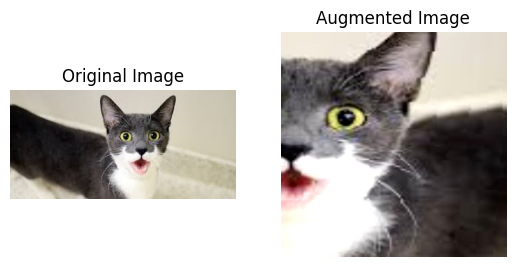

In [9]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Flip horizontally
    transforms.RandomRotation(30),      # Rotate by 30 degrees
    transforms.RandomResizedCrop(224),  # Randomly crop and resize
    transforms.ColorJitter(brightness=0.2, contrast=0.2)
])

# Load and apply transformations
img = Image.open("/content/cat.jpg")
aug_img = transform(img)

# Show original and augmented images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(aug_img)
ax[1].set_title("Augmented Image")
ax[1].axis("off")

plt.show()
